In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
import pandas_profiling as pf

In [3]:
import scipy.stats as stats
import statsmodels as sm

In [4]:
import sklearn as sk
from sklearn import metrics

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

In [7]:
 #Credit consumption data

credit_consum=pd.read_excel('CreditConsumptionData.xlsx',engine = 'openpyxl')
credit_consum

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [8]:
# Customers demographics data

credit_demo=pd.read_excel('CustomerDemographics.xlsx',engine = 'openpyxl') 
credit_demo

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [9]:
# Customers Behavior data

credit_behav=pd.read_excel('CustomerBehaviorData.xlsx', engine = 'openpyxl')
credit_behav

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [10]:
df= pd.merge(credit_consum, credit_demo,on='ID',how='inner')
df

,ID,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,current,M,34,MEDIUM,12.6,4,802.0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,NaN,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,NaN,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,NaN,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [11]:
final_data=pd.merge(df,credit_behav,on='ID',how='inner')
final_data

,ID,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,12554,20014.0,current,M,35,MEDIUM,15.0,1,708.0,0,...,2,40,24563.0,30051.32,12761.00,2,65,50836.0,Y,1674.09
1,17645,10173.0,current,M,35,HIGH,15.0,6,123.0,0,...,2,78,23948.0,42119.05,76206.00,21,63,23226.0,Y,13043.34
2,7604,16095.0,current,M,55,MEDIUM,24.5,1,802.0,1,...,2,82,10752.0,58373.25,75283.00,7,1,27036.0,Y,25375.27
3,1590,7707.0,current,F,29,MEDIUM,4.5,6,867.0,1,...,23,38,12607.0,69851.51,68708.00,21,83,43037.0,Y,3544.33
4,16556,96408.0,current,M,34,MEDIUM,12.6,4,802.0,1,...,24,50,25213.0,10071.00,80140.00,8,32,32044.0,NaN,12780.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,current,M,35,MEDIUM,13.5,1,523.0,0,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,NaN,current,M,53,MEDIUM,9.9,7,723.0,1,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,NaN,current,M,62,HIGH,37.8,8,863.0,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,NaN,current,M,34,MEDIUM,12.6,4,882.0,0,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   account_type                  19999 non-null  object 
 3   gender                        19999 non-null  object 
 4   age                           20000 non-null  int64  
 5   Income                        19999 non-null  object 
 6   Emp_Tenure_Years              20000 non-null  float64
 7   Tenure_with_Bank              20000 non-null  int64  
 8   region_code                   19999 non-null  float64
 9   NetBanking_Flag               20000 non-null  int64  
 10  Avg_days_between_transaction  19997 non-null  float64
 11  cc_cons_apr                   20000 non-null  float64
 12  dc_cons_apr                   20000 non-null  float64
 13  c

Non missing data according to CC_cons, as we will predict CC_Cons on missing data so seperate the nonmissing and 
missing  on the basis of cc_cons.


In [13]:
# We will separate out the existing and the new data.

In [14]:
# credit_spend= final_data[-final_data.cc_cons.isna()] 

credit_spend_existing = final_data[final_data.cc_cons.isnull()==0]
credit_spend_new1 = final_data[final_data.cc_cons.isnull()==1]

Now we have two datasets namely credit_spend_existing on which model will be build and credit_spend_new on which 
we will find cc_cons for our new datasets

### Data exploratory analysis and Data understanding

In [15]:
credit_spend_existing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   account_type                  15000 non-null  object 
 3   gender                        15000 non-null  object 
 4   age                           15000 non-null  int64  
 5   Income                        15000 non-null  object 
 6   Emp_Tenure_Years              15000 non-null  float64
 7   Tenure_with_Bank              15000 non-null  int64  
 8   region_code                   15000 non-null  float64
 9   NetBanking_Flag               15000 non-null  int64  
 10  Avg_days_between_transaction  14999 non-null  float64
 11  cc_cons_apr                   15000 non-null  float64
 12  dc_cons_apr                   15000 non-null  float64
 13  c

 As we have to predict credit consumption means credit spend by the customer that is our target variable, 
that will be a numeric value so that this is a regression problem.

In [16]:
credit_spend_existing.shape

(15000, 49)

In [17]:
print(list(credit_spend_existing.columns))

['ID', 'cc_cons', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active']


All columns names are right no need to renaming using .rename

### Univariate Analysis:

Univariate major purpose is to describe; It takes data, summarizes that data and finds patterns in the data and to see distribution of variables


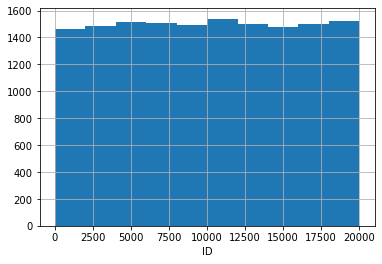

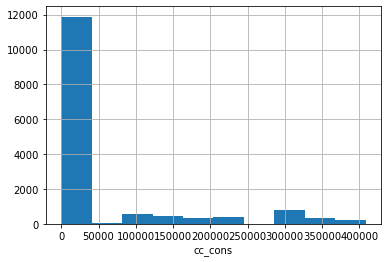

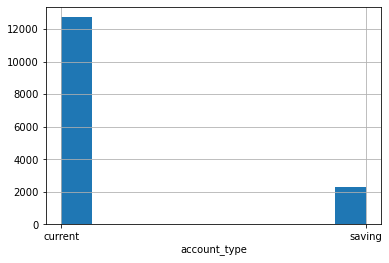

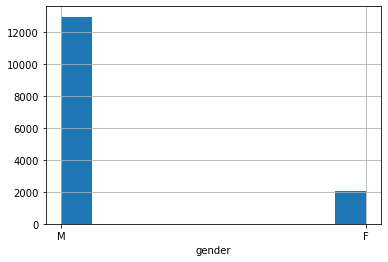

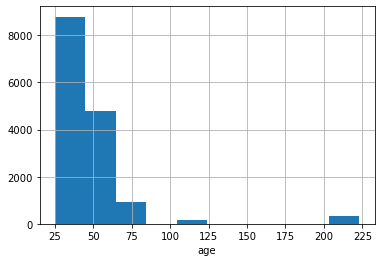

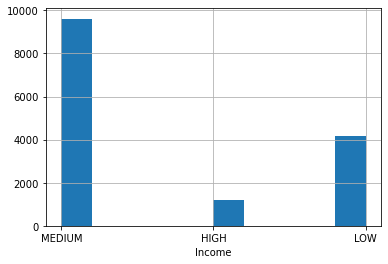

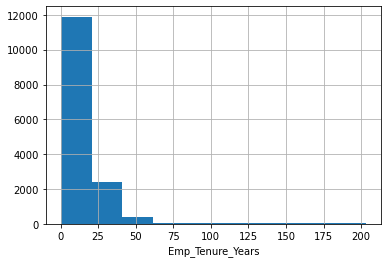

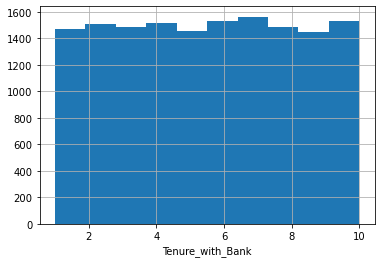

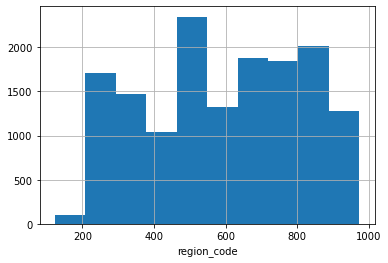

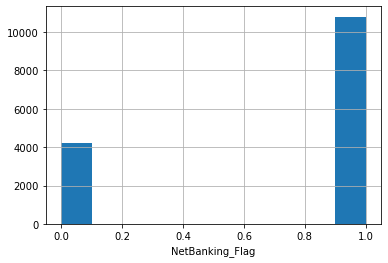

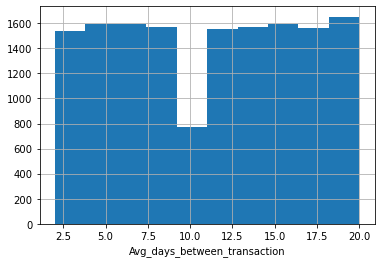

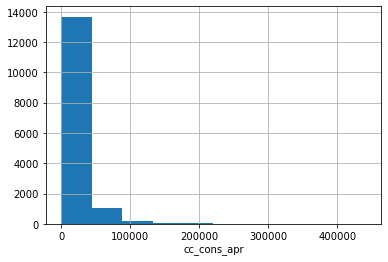

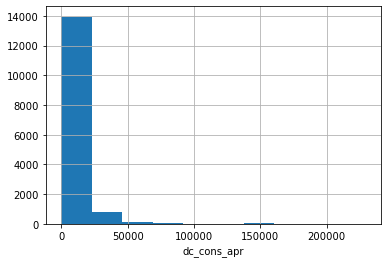

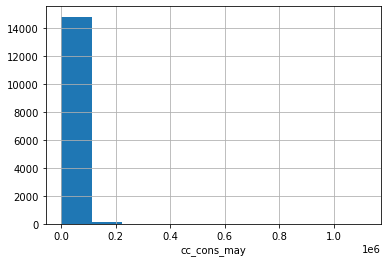

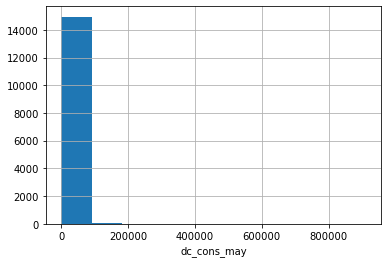

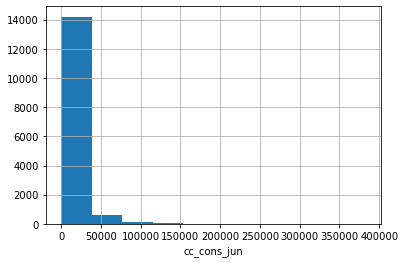

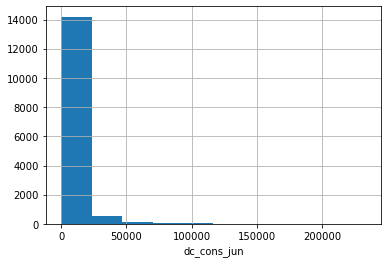

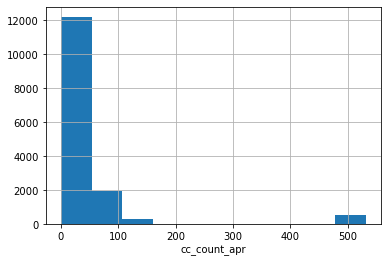

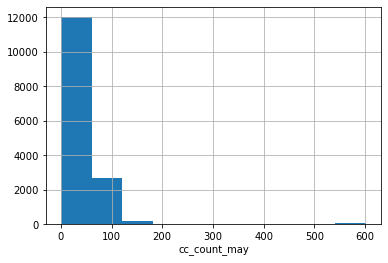

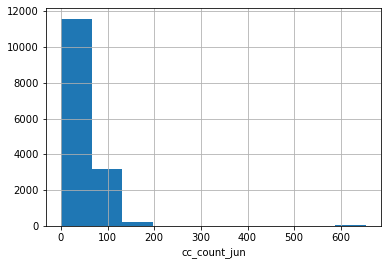

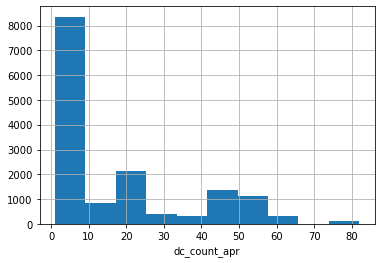

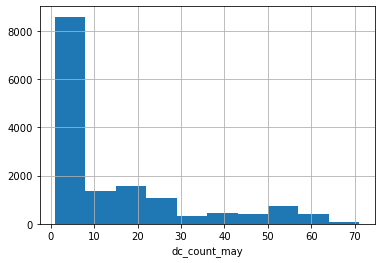

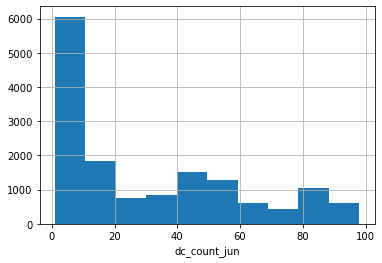

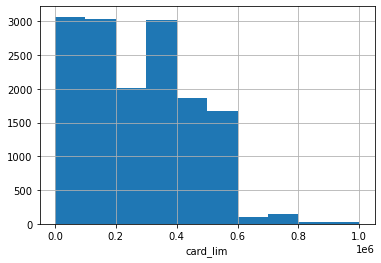

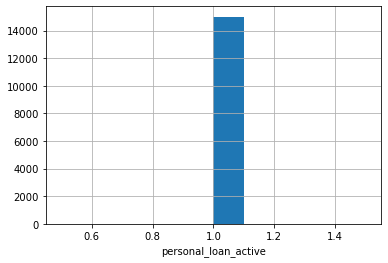

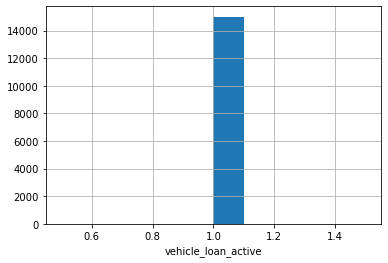

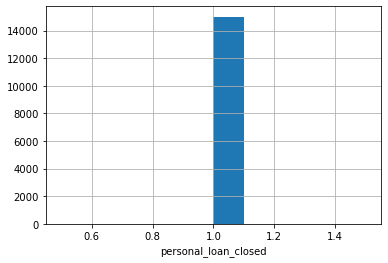

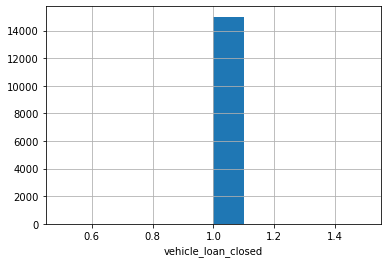

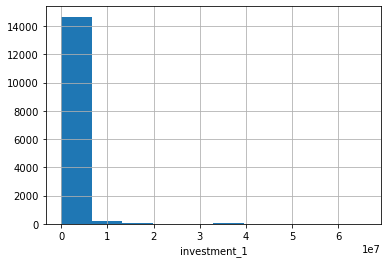

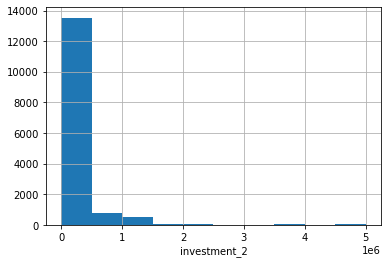

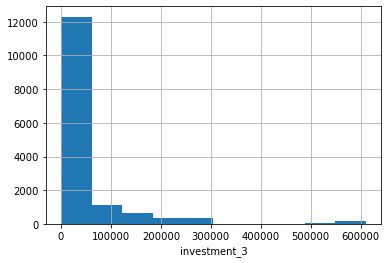

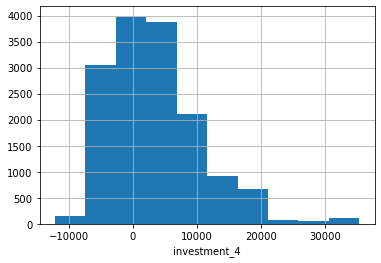

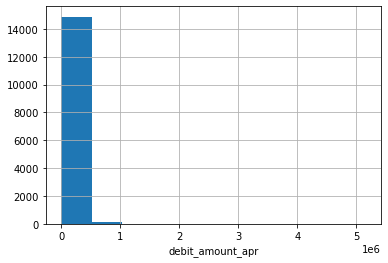

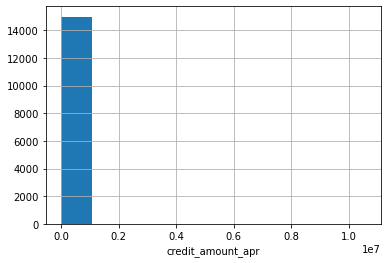

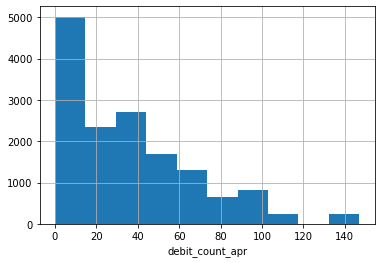

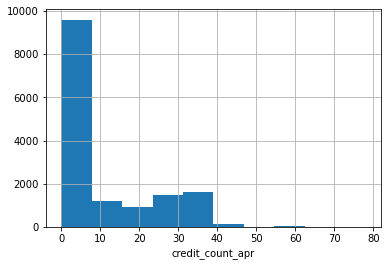

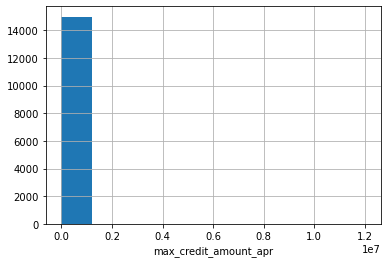

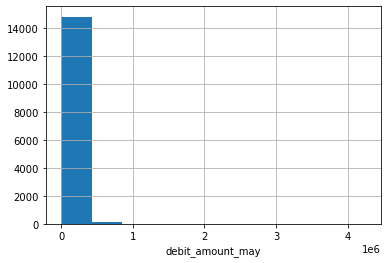

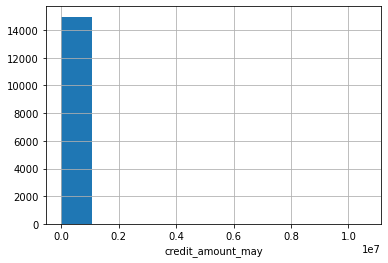

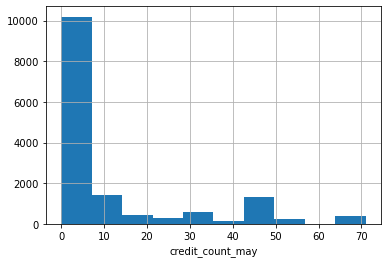

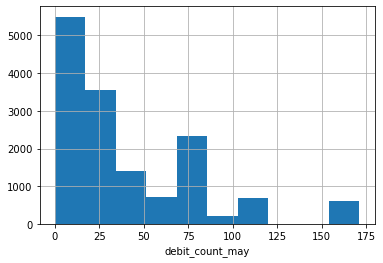

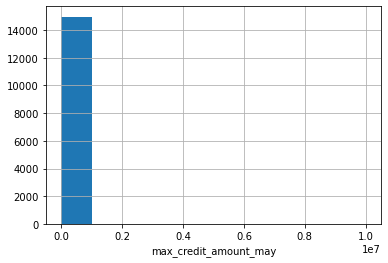

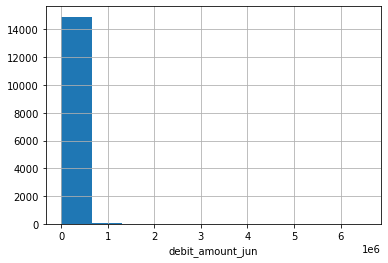

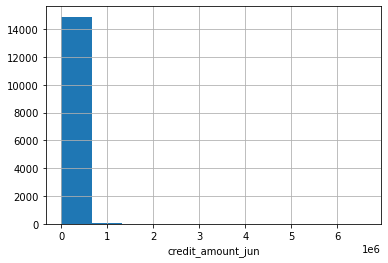

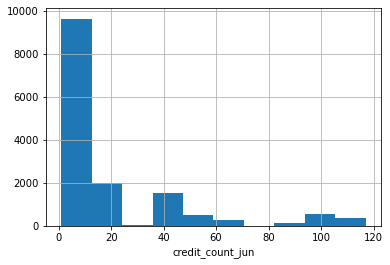

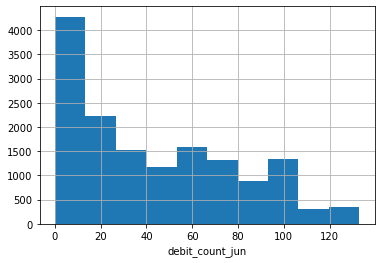

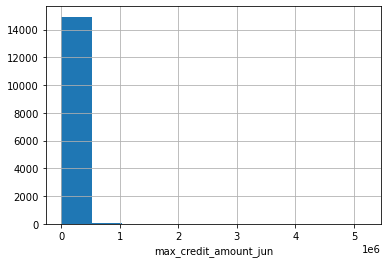

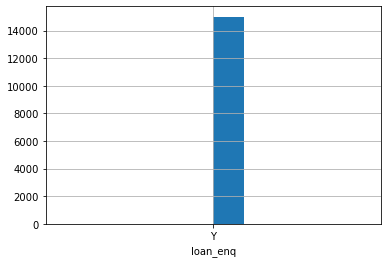

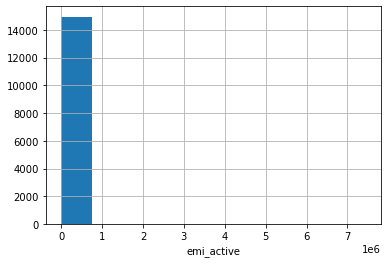

In [18]:
for i in credit_spend_existing.columns:
    credit_spend_existing[i].hist()
    plt.xlabel(str(i))
    plt.show()

In [19]:
credit_spend_existing.nunique()

ID                              15000
cc_cons                         12260
account_type                        2
gender                              2
age                                43
Income                              3
Emp_Tenure_Years                  270
Tenure_with_Bank                   10
region_code                       210
NetBanking_Flag                     2
Avg_days_between_transaction       19
cc_cons_apr                      7408
dc_cons_apr                      3638
cc_cons_may                      7461
dc_cons_may                      3786
cc_cons_jun                      6525
dc_cons_jun                      2874
cc_count_apr                       50
cc_count_may                       58
cc_count_jun                       67
dc_count_apr                       41
dc_count_may                       39
dc_count_jun                       54
card_lim                          308
personal_loan_active                1
vehicle_loan_active                 1
personal_loa

### Bivariate Analysis

It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

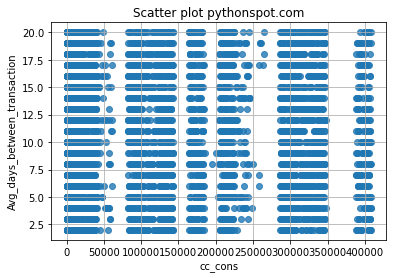

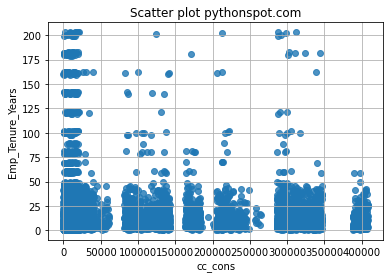

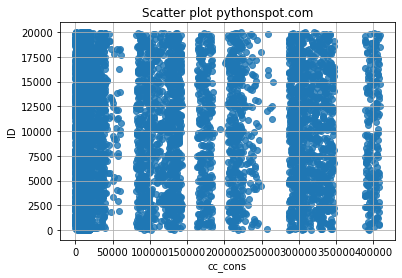

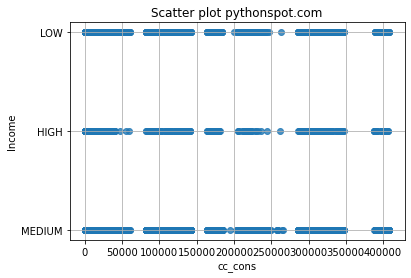

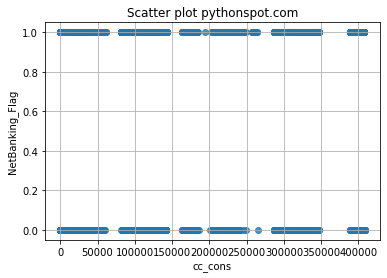

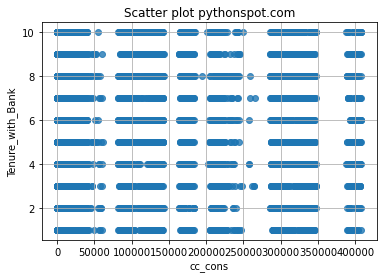

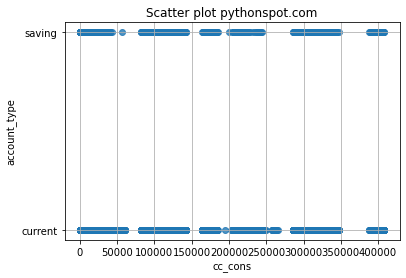

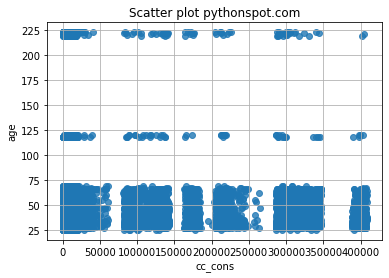

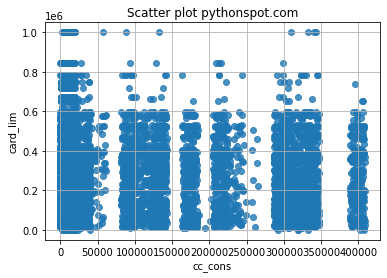

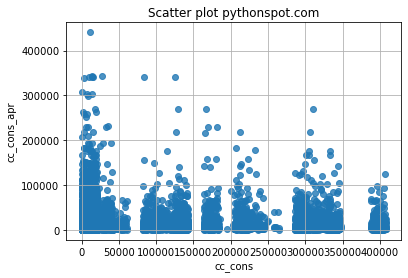

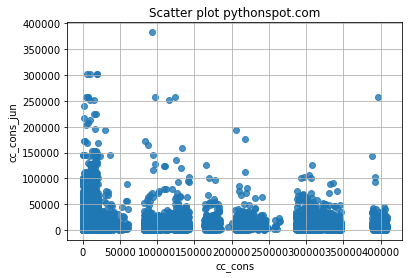

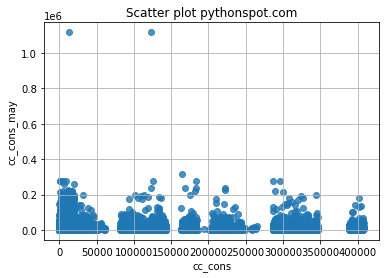

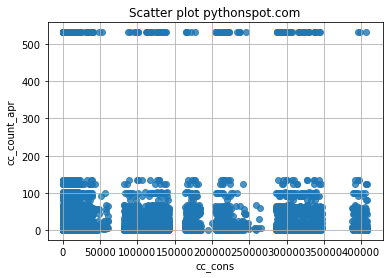

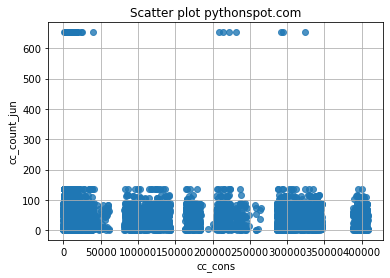

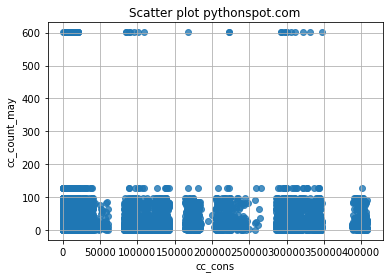

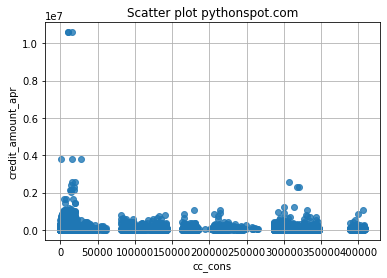

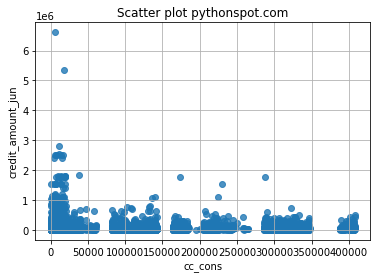

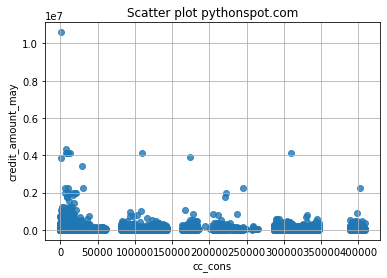

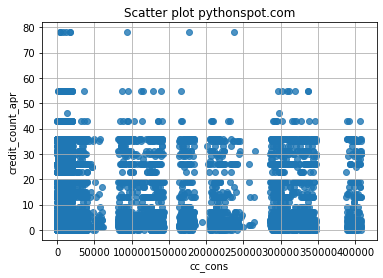

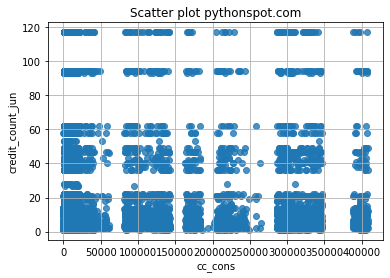

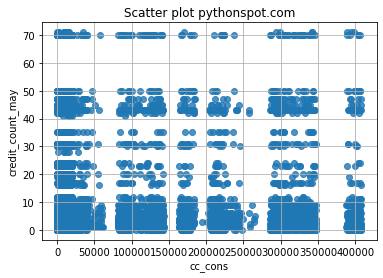

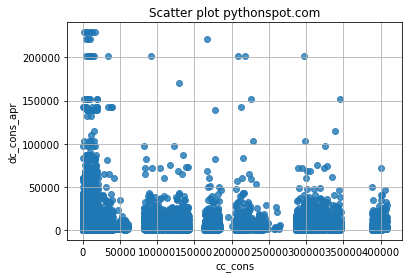

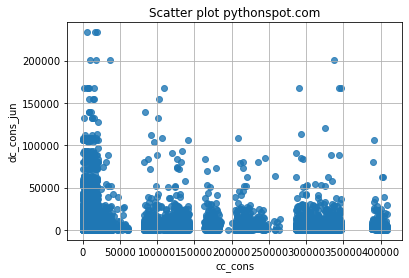

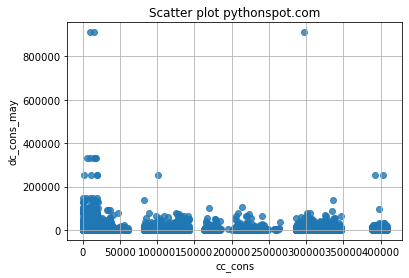

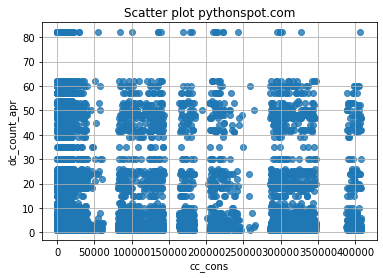

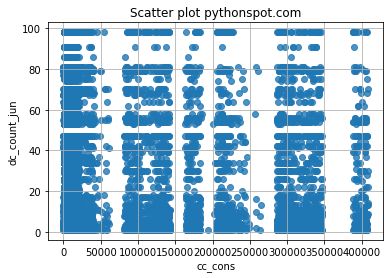

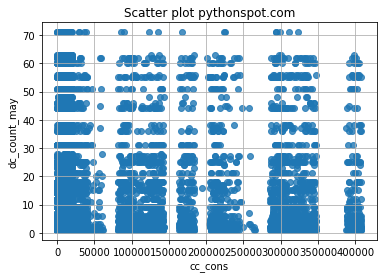

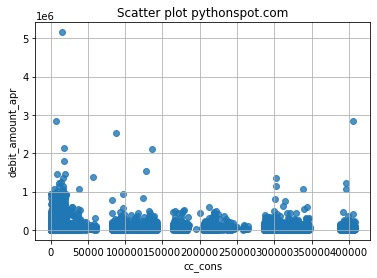

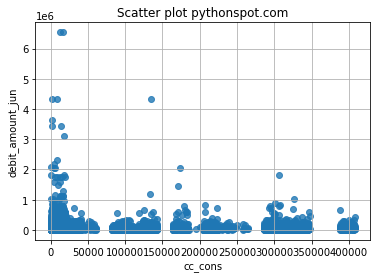

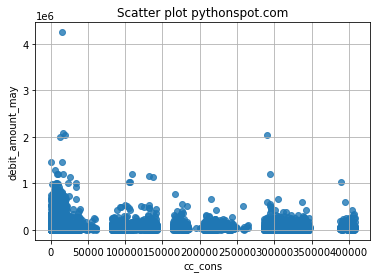

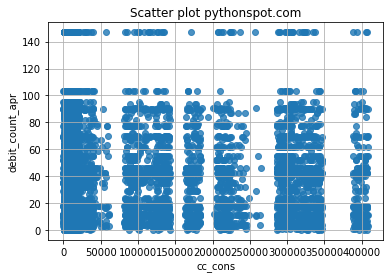

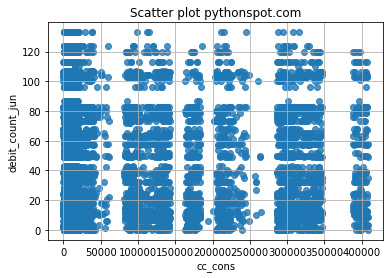

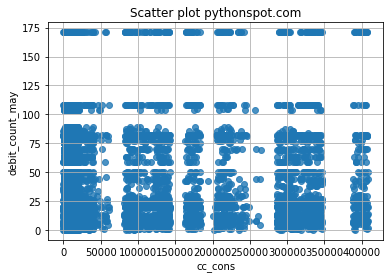

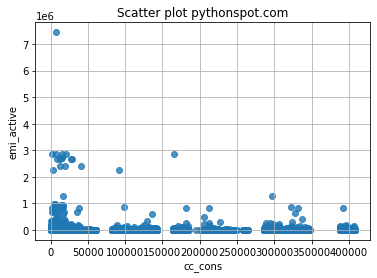

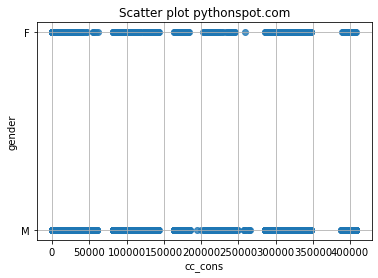

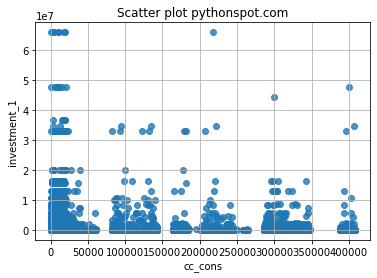

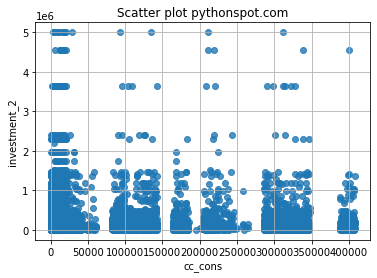

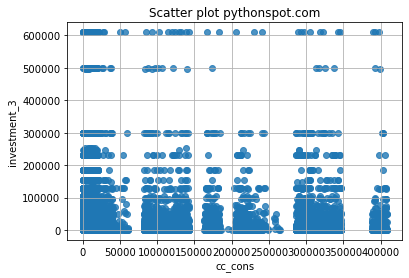

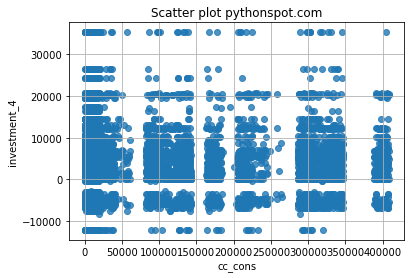

TypeError: 'value' must be an instance of str or bytes, not a float

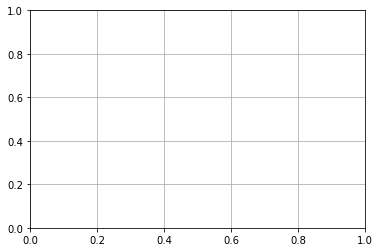

In [20]:
# Checking Bi-Variate Relationship with taget variable


for i in credit_spend_existing.columns.difference(['cc_cons']):
    plt.scatter(credit_spend_existing.cc_cons,credit_spend_existing[i], alpha=0.8)
    plt.title('Scatter plot pythonspot.com')
    plt.xlabel('cc_cons')
    plt.ylabel(str(i))  
    plt.show() 

Insights from Bivariate Analysis: 1. There are as such no relationship between any two variables.

In [ ]:
credit_spend_existing.head()

In [ ]:
credit_spend_existing.shape

In [ ]:
credit_spend_existing.describe()

In [ ]:
credit_spend_existing.Income.value_counts().plot(kind= 'bar')

Here our Y variable is cc_cons that is credit consumtion is a numerical variable, this problem comes in to regression problem.

### Data Cleaning 

#### Drop Variables

In [ ]:
# due to uniqueness of ID variable we drop this variable

credit_spend_existing.drop(["ID"],axis=1, inplace=True) 

The Distribution of Y variable should be normally distributed ( Assumption of linear regression)


In [ ]:
sns.distplot(credit_spend_existing.cc_cons)
plt.show()

As seen by above distribution plot, the distribution is not normal, to make it normal we have to take log of cc_cons (targe_variable) so 
that it can be a normally distributed variable.( Assumption of Linear Regression)

In [ ]:
credit_spend_existing['ln_cc_cons']= np.log(credit_spend_existing['cc_cons']+1)
sns.distplot(credit_spend_existing.ln_cc_cons)
plt.show()

We can see above most data points are not near to line which means our data is not normally distributed.
To making our dependent variable Y(cc_cons) normally distributed. we took log transformation of it but we will see, it is still not showing normally distributed so, linear regression cannt be possible here. We can have some other algorithems for the modelling purpose. we can use Random Forest Regressor. 
But, before that we can check other assumptions of linear regression also, here.

In [ ]:
credit_spend_existing.columns

Creating Categorical List= Contains categorical variables

In [ ]:
for x in ['account_type','gender', 'Income','loan_enq']:
    credit_spend_existing[x]=credit_spend_existing[x].astype('object')

In [ ]:
credit_spend_existing[x]

### Separate numerical and categorical variable

In [ ]:
# Find numerical variable in Data frame.
numeric_var_names = [key for key in dict(credit_spend_existing.dtypes) 
                     if dict(credit_spend_existing.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]


# Find Categorical variable in Data frame.
cat_var_names = [key for key in dict(credit_spend_existing.dtypes) 
                 if dict(credit_spend_existing.dtypes)[key] in ['object']]


print( numeric_var_names)
print(cat_var_names)

In [ ]:
#Convert a list in to dataframe 

#Information about numericvariable in custdata_df


credit_spend_existing_num=credit_spend_existing[numeric_var_names]
credit_spend_existing_num.head(5)

In [ ]:
#Convert a list in to dataframe 

#Information about categorical variable in custdata_df


credit_spend_existing_cat=credit_spend_existing[cat_var_names]
credit_spend_existing_cat.head(5)

### Creating Data audit Report


In [ ]:
# Use a general function that returns multiple values



def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credit_spend_existing_num.apply(lambda x: var_summary(x)).T

In [ ]:
num_summary

In [ ]:
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts(),x.unique()],
                    index=['N','NMISS','ColumnNames','UniqueValues'])

In [ ]:
cat_summary=credit_spend_existing.apply(lambda x:cat_summary(x)).T
cat_summary

### Handling Outliers

In [ ]:
#Handling Outliers for numerical data - Through function

credit_spend_existing_num =  credit_spend_existing_num.apply(lambda x: x.clip(lower = x.quantile(0.01),
                                                                              upper = x.quantile(0.99)))


In [ ]:
credit_spend_existing_num

### Handling Missing Values

In [ ]:
# Missing value imputation for categorical and continuous variables


def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode().iloc[0])
    return x

In [ ]:
#for categorical and continuous variables
credit_spend_existing_num = credit_spend_existing_num.apply(missing_imputation)
credit_spend_existing_num

In [ ]:
credit_spend_existing_cat = credit_spend_existing_cat.apply(missing_imputation)
credit_spend_existing_cat

### Again check missing values has been treated or not


In [ ]:
# Find the total number of missing values in the numerical data i.e custdata_df_num

print ("\nMissing values in numerical data :  ", credit_spend_existing_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", credit_spend_existing_cat.isnull().sum().values.sum())

### Dummy creation for categorical data

In [ ]:
# We need to create a function for dummy creation

def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname)
    col_dummies.drop(col_dummies.columns[0], axis = 1, inplace = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [ ]:
credit_spend_existing_cat=credit_spend_existing.select_dtypes(include=['object'])
cat_varlist=list(credit_spend_existing_cat.columns)
cat_varlist

In [ ]:
# For customer_features in categorical features

for c_feature in cat_varlist:
    credit_spend_existing_cat[c_feature]=credit_spend_existing_cat[c_feature].astype('category')
    credit_spend_existing_cat=create_dummies(credit_spend_existing_cat,c_feature)

In [ ]:
credit_spend_existing_cat.head(5)

### Merge Numerical and categorical data 

In [ ]:
credit_spend_existing_fin = pd.concat([credit_spend_existing_num, credit_spend_existing_cat], axis=1)
credit_spend_existing_fin.head()

In [ ]:
credit_spend_existing_fin.drop('ln_cc_cons', axis= 1, inplace=True)

In [ ]:
credit_spend_existing_fin.shape

### Explore data and check the variable distribution for linear regression modelling 

In [ ]:
# For Linear regressin y(cc_cons) should follow normal distribution

sns.distplot(credit_spend_existing_fin.cc_cons)

Now as you can see distribution is right skewed so we need to take log and then plot the graph.

In [ ]:
#from scipy import stats
import pylab

stats.probplot(credit_spend_existing_fin.cc_cons, dist="norm", plot=pylab )
pylab.show()

As we can see above graph our data is not distributed normally perfectly as discussed previously.
We will use boxcox techniue to make it perfect normal


In [ ]:
#from scipy import stats

# transform training data & save lambda value

credit_spend_existing_fin['bc_cc_cons'],fitted_lambda = stats.boxcox(credit_spend_existing_fin['cc_cons']+1)

In [ ]:
credit_spend_existing_fin['bc_cc_cons'],fitted_lambda

In [ ]:
sns.distplot(credit_spend_existing_fin.bc_cc_cons)

In [ ]:
stats.probplot(credit_spend_existing_fin.bc_cc_cons, dist="norm", plot=pylab )
pylab.show()

In [ ]:
credit_spend_existing_fin.drop('bc_cc_cons', axis=1, inplace=True)

In [ ]:
credit_spend_existing_fin.columns

### Divide data into train and test data 

In [ ]:
#Splitting the data in all x variable and y variable.

feature_columns=credit_spend_existing_fin.columns.difference(['cc_cons'])

In [ ]:
feature_columns

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(credit_spend_existing_fin[feature_columns],
                                              credit_spend_existing_fin['cc_cons'],
                                              test_size=0.2,
                                              random_state=12)

In [ ]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

### Random Forest Regression Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
#RandomForestRegressor?

In [ ]:
param_grid={'n_estimators':np.arange(5,25)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)

tree.fit(train_x,train_y)

In [ ]:
tree.best_params_

In [ ]:
radm_clf = RandomForestRegressor(oob_score=False,n_estimators=12,max_depth=None)
radm_clf.fit( train_x, train_y)

#### Prediction task over the test data that is test_x

In [ ]:
# Use the forest's predict method on the test data

pred_y = radm_clf.predict(test_x)

In [ ]:
df1 = pd.DataFrame({'Real Values':test_y, 'Predicted Values':pred_y})
df1

In [ ]:
errors = abs((pred_y - test_y)/test_y)
print('Mean Absolute Percentage Error:', round(np.mean(errors), 5))

In [ ]:
rmspe = np.sqrt(np.mean(np.square(((test_y - pred_y) / test_y)), axis=0))
print('Root Mean Squared Percentage Error (RMSPE)::', rmspe)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_y, pred_y, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_y, pred_y))
print('Explained Variance Score:', metrics.explained_variance_score(test_y, pred_y))
print('Max Error:', metrics.max_error(test_y, pred_y))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_y, pred_y))
print('Median Absolute Error:', metrics.median_absolute_error(test_y, pred_y))
print('R^2:', metrics.r2_score(test_y, pred_y))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_y, pred_y))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_y, pred_y))

In [ ]:
# Calculate mean absolute percentage error (MAPE)

mape = 100 * (errors / test_y)
mape

In [ ]:
#Calculate and display accuracy 

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

####After building model we will apply our new model on new datasets that is credit_spend_new 


### TEST ON NEW DATASETS "CREDIT_SPEND_NEW 

In [ ]:
credit_spend_new1.head()

In [ ]:
credit_spend_new1.drop(['cc_cons','ID'],axis=1, inplace= True)

Creating Ctegorical List= Contains categorical variables

In [ ]:
for x in ['account_type','gender', 'Income','loan_enq']:
    credit_spend_new1[x]=credit_spend_new1[x].astype('object')

In [ ]:
credit_spend_new1[x]

#### Separate numerical and categorical variable for new datasets 

need to apply for loop along with if condition.

In [ ]:
# Find numerical variable in Data frame.

numeric_var_names = [key for key in dict(credit_spend_new1.dtypes) if dict(credit_spend_new1.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]



# Find Categorical variable in Data frame

cat_var_names = [key for key in dict(credit_spend_new1.dtypes) if dict(credit_spend_new1.dtypes)[key] in ['object']]



#Print the data frame

print( numeric_var_names)
print(cat_var_names)

In [ ]:
#Convert a list in to dataframe

#Information about numericvariable in credit_spend_new_num

credit_spend_new1_num=credit_spend_new1[numeric_var_names]
credit_spend_new1_num.head(5)

In [ ]:
credit_spend_new1_cat=credit_spend_new1[cat_var_names]
credit_spend_new1_cat.head(5)

#### Handling Outliers

In [ ]:
#Handling Outliers for numerical data - Through function

credit_spend_new1_num=  credit_spend_new1_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

#### Handling Missing Values

In [ ]:
# for categorical and continuous variables
credit_spend_new1_num = credit_spend_new1_num.apply(missing_imputation)
credit_spend_new1_num

In [ ]:
credit_spend_new1_cat = credit_spend_new1_cat.apply(missing_imputation)
credit_spend_new1_cat

In [ ]:
# Find the total number of missing values in the numerical data i.e custdata_df_num
print ("\nMissing values in numerical data :  ", credit_spend_new1_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", credit_spend_new1_cat.isnull().sum().values.sum())

#### Dummy Creation 

In [ ]:
credit_spend_new1_cat=credit_spend_new1_cat.select_dtypes(include=['object'])

cat_varlist=list(credit_spend_new1_cat.columns)

In [ ]:
# For customer_features in categorical features

for c_feature in cat_varlist:
    credit_spend_new1_cat[c_feature]=credit_spend_new1_cat[c_feature].astype('category')
    credit_spend_new1_cat=create_dummies(credit_spend_new1_cat,c_feature)

In [ ]:
credit_spend_new1_cat.sample(5)

In [ ]:
credit_spend_new_fin = pd.concat([credit_spend_new1_num, credit_spend_new1_cat], axis=1)

In [ ]:
credit_spend_new_fin.head()

In [ ]:
credit_spend_new_fin.shape

### Making prediction on new datasets

In [ ]:
# Use the forest's predict method on the test data

pred_cc_cons = radm_clf.predict(credit_spend_new_fin)

In [ ]:
pred_cc_cons=pd.DataFrame(pred_cc_cons.tolist())

In [ ]:
pred_cc_cons.columns = ['pred_cc_cons']
pred_cc_cons

In [ ]:
credit_spend_new_fin.reset_index(inplace= True)
credit_spend_new_fin

In [ ]:
#Concatenating final prediction with original test file
  
new_data_output = pd.concat([credit_spend_new_fin, pred_cc_cons], axis=1)

new_data_output.head()

In [ ]:
new_data_output.to_csv('credit_spend_new_output.csv')

## Feature Importance using Random Forest ( .feature_importances_): Method1 

In [ ]:
from sklearn import metrics

In [ ]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank)

As above graph is not clear so we will use below method.

In [ ]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

feature_rank

In [ ]:
#Select features and then convert it into list

x=feature_rank.loc[0:75,['feature']]
x=x['feature'].tolist()
print(x)

In [ ]:
# Create data frame with selected features

rf_features=['emi_active', 'cc_cons_may', 'cc_cons_apr', 'cc_cons_jun', 'max_credit_amount_jun', 
             'investment_1', 'debit_amount_may', 'credit_amount_apr', 'max_credit_amount_apr', 
             'dc_cons_jun', 'dc_cons_apr', 'debit_amount_jun', 'max_credit_amount_may',
             'credit_amount_jun', 'debit_amount_apr', 'credit_amount_may', 'dc_cons_may', 
             'investment_3', 'investment_2', 'Emp_Tenure_Years', 'card_lim', 'region_code', 'investment_4',
             'cc_count_jun', 
             'debit_count_jun', 'debit_count_apr', 'cc_count_may', 'debit_count_may', 'age', 'credit_count_may', 
             'credit_count_jun', 'Avg_days_between_transaction', 'dc_count_jun', 'cc_count_apr', 'dc_count_may', 
             'dc_count_apr', 'credit_count_apr', 'Tenure_with_Bank', 'NetBanking_Flag', 'account_type_saving',
             'Income_LOW', 'gender_M', 
             'Income_MEDIUM', 'vehicle_loan_active', 'personal_loan_active', 'personal_loan_closed', 'vehicle_loan_closed']

rf_features.append('cc_cons')
df_rf= credit_spend_existing_fin[rf_features]

df_rf.head(5)

###  Visualizing a Single Decision Tree

In [ ]:
pip install pydot

In [ ]:
feature_list = list(df_rf.columns)

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from sklearn.tree import DecisionTreeClassifier

# Pull out one tree from the forest
tree = radm_clf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_x, train_y)


# Extract the small tree

tree_small = rf_small.estimators_[5]

# Save the tree as a png image

export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

### Variable Importances ( Method :2) 

In [ ]:
# Get numerical feature importances
importances = list(radm_clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(credit_spend_existing_fin, round(importance, 5)) for credit_spend_existing_fin, importance in zip(feature_columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### Visualizations

In [ ]:
# Import matplotlib for plotting  in Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_columns, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Model is made successfully and tested also, we will still see the remaining assumption of the linear regression.

### Check - 1: Find multicolinearlity : using VIF

In [ ]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [ ]:
df_rf['ln_cc_cons']= np.log(df_rf['cc_cons']+1)
rf_features=df_rf.columns
rf_features

In [ ]:
#gather features
features = "+".join(rf_features)

In [ ]:
features

In [ ]:
# get y and X dataframes based on this regression:
y, X = dmatrices('ln_cc_cons~' + features,df_rf, return_type='dataframe')

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
vif.sort_values(by=['VIF Factor'],ascending=False)

In [ ]:
vif1=vif[vif['VIF Factor']<10].reset_index().loc[:,['features']]
vif1

In [ ]:
# dropping variables that have VIF greater than 10
#df_rf.drop(drop_vars,axis=1,inplace=True)

In [ ]:
df_rf.shape

### Check 2 - All x variables should have a linear relationship with Y 

To build model again splitting data for training and testing

In [ ]:
# Dropping variables one at a time which have p-values greater than 5%

feature_columns=df_rf.columns.difference(['ln_cc_cons','Avg_days_between_transaction', 'Emp_Tenure_Years', 'Income_LOW', 'Income_MEDIUM',
                                          'NetBanking_Flag', 'Tenure_with_Bank', 'account_type_saving', 'age', 
                                          'card_lim', 'cc_cons', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may', 'cc_count_apr', 'cc_count_jun',
                                          'cc_count_may', 'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may', 'credit_count_apr', 
                                          'credit_count_jun', 'credit_count_may', 'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'dc_count_apr', 
                                          'dc_count_jun', 'dc_count_may', 'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may', 'debit_count_apr',
                                          'debit_count_jun', 'debit_count_may', 'emi_active', 'gender_M', 'investment_1', 'investment_2', 'investment_3', 
                                          'investment_4', 'max_credit_amount_apr', 'max_credit_amount_jun', 'max_credit_amount_may', ])
print(list(feature_columns))

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(df_rf[feature_columns],
                                              df_rf['ln_cc_cons'],
                                               test_size=.2,
                                               random_state=123)

## Build Regression model using statsmodels.api

In [ ]:
import statsmodels.api as sm

In [ ]:
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

In [ ]:
print(lm.summary())

In [ ]:
lm.pvalues.sort_values(ascending=False)

In [ ]:
# Find the parameters of x i.e Beta value

print('Parameters:', lm.params) 

# Find the r2

print('R2: ', lm.rsquared)

### Evaluation of model accuracy 

In [ ]:
test_pred=lm.predict(test_x)
train_pred=lm.predict(train_x)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

In [ ]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

In [ ]:
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)


### Check 3: Normality of Residuals 

In [ ]:
residuals=train_y-train_pred

import seaborn as sns

sns.distplot(residuals)

In [ ]:
from scipy import stats
import pylab

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

 As a final note, on this datasets we make Random Forest Regressor model as our target variable is not normally distributed. 
